<a href="https://colab.research.google.com/github/rain1607/CNN_marigoldd/blob/main/CNN_marigoldipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

In [3]:
import numpy as np
import cv2
import os
from tqdm import tqdm
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [4]:
from os import listdir
from os.path import isfile, join

In [6]:
width = 128
num_classes = 4
trainpath = 'train/'
testpath = 'test/'
trainImg = [trainpath+f for f in listdir(trainpath) if listdir(join(trainpath, f))]
testImg = [testpath+f for f in listdir(testpath) if listdir(join(testpath, f))]

In [7]:
trainImg

['train/S', 'train/M', 'train/XL', 'train/L']

In [8]:
def img2data(path):
  rawImgs = []
  labels = []
  c = 0
  for imagePath in (path):
      for item in tqdm(os.listdir(imagePath)):
          file = os.path.join(imagePath, item)
          #print(file)
          c+=1
          l = imagePath.split('/')[1]
          
          if l == 'XL':
            labels.append([1,0,0,0])         
          elif l == 'L':
            labels.append([0,1,0,0])
          elif l == 'M':
            labels.append([0,0,1,0])
          elif l == 'S':
            labels.append([0,0,0,1])    
          if file[-1] =='g':
            img = cv2.imread(file , cv2.COLOR_BGR2RGB)
            img = cv2.resize(img ,(width,width))
            rawImgs.append(img)
  return rawImgs, labels

In [9]:
x_train, y_train = img2data(trainImg)
x_test, y_test = img2data(testImg)

100%|██████████| 11/11 [00:01<00:00,  6.78it/s]


In [10]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [11]:
x_train.shape,y_train.shape,x_test.shape, y_test.shape

((164, 128, 128, 3), (164, 4), (41, 128, 128, 3), (41, 4))

In [12]:
model = keras.Sequential([
        keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(width, width, 3)),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(128,(3,3) , activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2 )),
        keras.layers.Dense(16),
        keras.layers.Flatten(),

        keras.layers.Dense(num_classes, activation='softmax') #softmax for one hot . . # sigmoid for 0/1
    ])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
dense (Dense)                (None, 30, 30, 16)        2064      
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 5

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy'
                , metrics= ['accuracy'])
batch_size = 32
epochs = 10

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [15]:
history = model.fit(x_train, y_train ,batch_size=batch_size, epochs=epochs ,validation_data=(x_test, y_test))


Epoch 1/10
6/6 [==============================] - 14s 2s/step - loss: 1.3689 - accuracy: 0.2866 - val_loss: 1.3208 - val_accuracy: 0.3902
Epoch 2/10
6/6 [==============================] - 13s 2s/step - loss: 1.2976 - accuracy: 0.5976 - val_loss: 1.2609 - val_accuracy: 0.7805
Epoch 3/10
6/6 [==============================] - 13s 2s/step - loss: 1.2292 - accuracy: 0.7378 - val_loss: 1.1783 - val_accuracy: 0.7805
Epoch 4/10
6/6 [==============================] - 13s 2s/step - loss: 1.1375 - accuracy: 0.8232 - val_loss: 1.0747 - val_accuracy: 0.9268
Epoch 5/10
6/6 [==============================] - 13s 2s/step - loss: 1.0215 - accuracy: 0.8902 - val_loss: 0.9423 - val_accuracy: 0.9268
Epoch 6/10
6/6 [==============================] - 13s 2s/step - loss: 0.8711 - accuracy: 0.9146 - val_loss: 0.7900 - val_accuracy: 0.9268
Epoch 7/10
6/6 [==============================] - 13s 2s/step - loss: 0.7305 - accuracy: 0.8780 - val_loss: 0.6334 - val_accuracy: 0.9268
Epoch 8/10
6/6 [==================

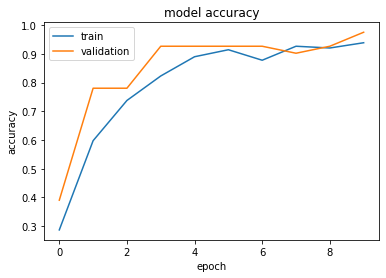

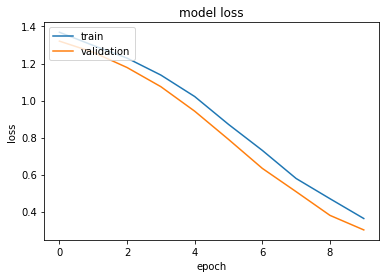

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Transfer learning with MobilenetV2

In [23]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(width,width,3),
                                                   include_top=False,
                                                   weights='imagenet')
base_model.trainable = False
num_classes = 4

model = keras.Sequential([
        base_model,
        
        keras.layers.Conv2D(128, 3, activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(16),
        keras.layers.Flatten(),
        keras.layers.Dense(num_classes, activation='softmax')
    ])


9420800/9406464 [==============================] - 0s 0us/step


In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Functi (None, 4, 4, 1280)        2257984   
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         1474688   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 128)         0         
_________________________________________________________________
dense_2 (Dense)              (None, 1, 1, 16)          2064      
_________________________________________________________________
flatten_1 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                

In [33]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy'
                , metrics= ['accuracy'], weighted_metrics=['accuracy'])

batch_size = 32
epochs = 10

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [34]:
history = model.fit(x_train, y_train ,batch_size=batch_size, epochs=epochs ,validation_data=(x_test, y_test))


Epoch 1/10
6/6 [==============================] - 6s 518ms/step - loss: 0.0018 - accuracy: 1.0000 - weighted_accuracy: 1.0000 - val_loss: 0.0548 - val_accuracy: 0.9756 - val_weighted_accuracy: 0.9756
Epoch 2/10
6/6 [==============================] - 2s 350ms/step - loss: 0.0017 - accuracy: 1.0000 - weighted_accuracy: 1.0000 - val_loss: 0.0127 - val_accuracy: 1.0000 - val_weighted_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 2s 336ms/step - loss: 3.5648e-04 - accuracy: 1.0000 - weighted_accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000 - val_weighted_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 2s 345ms/step - loss: 0.0062 - accuracy: 1.0000 - weighted_accuracy: 1.0000 - val_loss: 0.0486 - val_accuracy: 1.0000 - val_weighted_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 2s 341ms/step - loss: 0.0041 - accuracy: 1.0000 - weighted_accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000 - val_weighted_accuracy: 1.0

In [36]:
model.save('my_marigold.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


test model

[[2.5783339e-10 9.9999726e-01 9.5541131e-09 2.7508538e-06]]
real:L050.jpg
predict:L


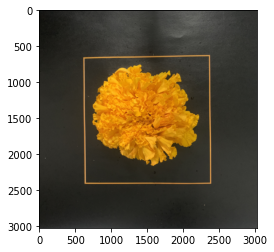

[[1.0000000e+00 2.2150308e-09 2.0989998e-11 6.4674550e-16]]
real:XL013.jpg
predict:XL


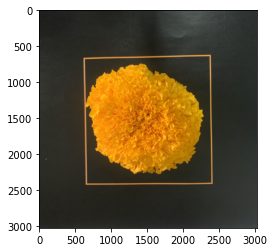

[[4.2132100e-08 3.6493328e-04 9.9962461e-01 1.0355224e-05]]
real:M050.jpg
predict:M


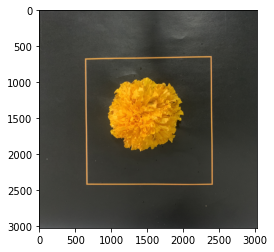

[[6.5169168e-09 1.7690634e-05 9.9996483e-01 1.7563814e-05]]
real:M039.jpg
predict:M


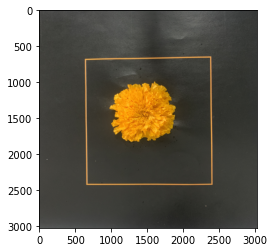

[[8.5713375e-10 9.9998569e-01 4.7079278e-09 1.4251580e-05]]
real:L037.jpg
predict:L


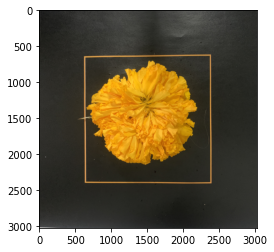

[[1.499383e-10 9.999970e-01 2.441260e-07 2.682549e-06]]
real:L034.jpg
predict:L


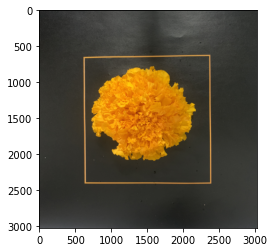

[[1.0000000e+00 1.9309048e-09 1.3416115e-10 6.2936513e-17]]
real:XL0016.jpg
predict:XL


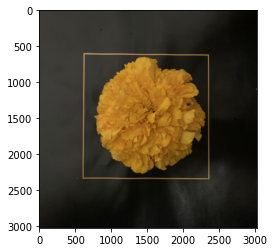

[[1.0199582e-09 9.9998319e-01 7.1036732e-07 1.6076187e-05]]
real:L027.jpg
predict:L


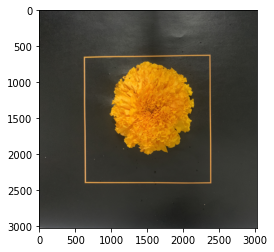

[[7.7020945e-10 1.8953822e-06 9.9881929e-01 1.1788377e-03]]
real:M037.jpg
predict:M


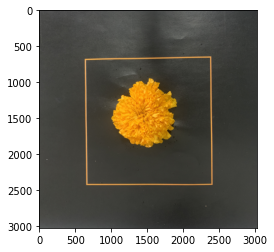

[[8.266879e-10 9.999994e-01 4.386666e-09 5.749274e-07]]
real:L040.jpg
predict:L


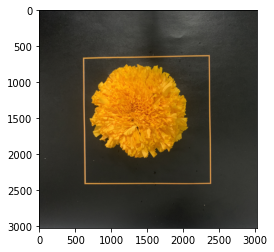

[[4.4002714e-08 5.6943527e-06 9.9999416e-01 6.3899492e-08]]
real:M024.jpg
predict:M


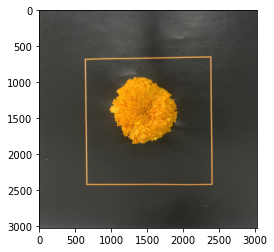

[[9.9985838e-01 1.4128879e-04 3.2299047e-07 9.6890673e-10]]
real:XL049.jpg
predict:XL


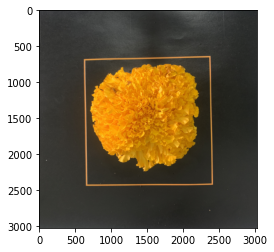

[[1.0847896e-16 1.3043152e-08 1.6691650e-11 1.0000000e+00]]
real:S012.jpg
predict:S


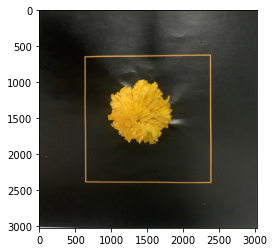

[[2.6815955e-10 9.9999928e-01 6.4589920e-09 7.4514816e-07]]
real:L038.jpg
predict:L


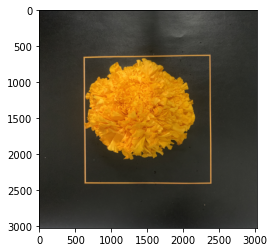

[[1.4727696e-17 2.8124816e-07 5.3796984e-11 9.9999976e-01]]
real:S024.jpg
predict:S


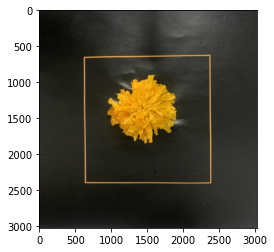

[[1.0975877e-09 2.8376135e-06 9.9992239e-01 7.4749798e-05]]
real:M038.jpg
predict:M


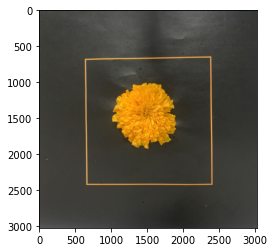

[[1.10365495e-08 3.63391038e-04 9.99632478e-01 4.06836261e-06]]
real:M049.jpg
predict:M


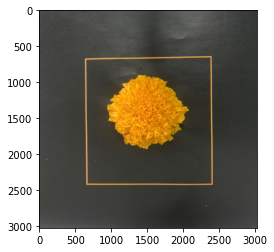

[[4.9140522e-12 9.9999726e-01 4.8161897e-10 2.6955695e-06]]
real:L035.jpg
predict:L


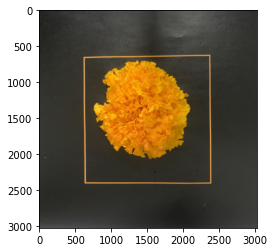

[[9.9999928e-01 7.1400427e-07 3.4041800e-10 1.8114713e-13]]
real:XL012.jpg
predict:XL


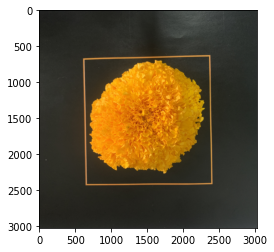

[[1.0000000e+00 2.0332276e-09 3.8811745e-12 8.3818688e-17]]
real:XL0013.jpg
predict:XL


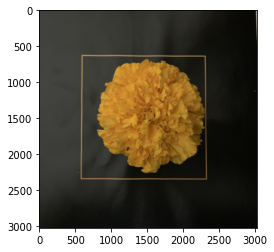

[[1.1299930e-08 9.9999833e-01 2.2328067e-07 1.4787191e-06]]
real:L047.jpg
predict:L


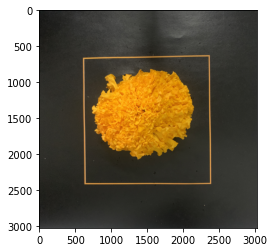

[[1.1067104e-08 9.9999762e-01 1.5041489e-06 8.4991871e-07]]
real:L048.jpg
predict:L


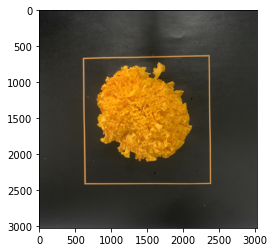

[[6.8474287e-10 8.8990455e-06 9.9999106e-01 4.1086398e-08]]
real:M044.jpg
predict:M


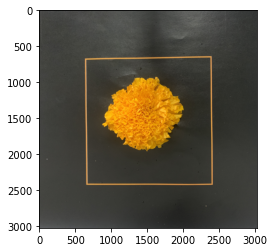

[[9.9998581e-01 1.4127654e-05 4.0738657e-10 1.0117214e-11]]
real:XL0011.jpg
predict:XL


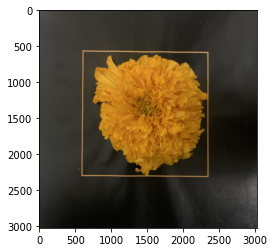

[[2.4493055e-11 9.9997807e-01 1.0947498e-07 2.1783664e-05]]
real:L044.jpg
predict:L


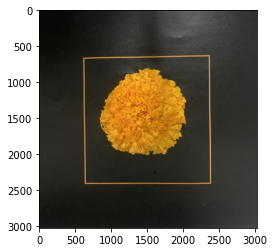

[[9.3888364e-14 9.9999988e-01 1.7501516e-10 1.1781578e-07]]
real:L030.jpg
predict:L


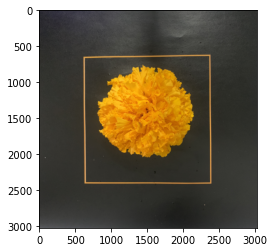

[[3.6202963e-09 3.7745531e-07 9.9999845e-01 1.2317456e-06]]
real:M042.jpg
predict:M


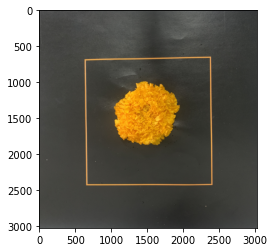

[[1.7012948e-18 4.7517856e-09 3.6046348e-12 1.0000000e+00]]
real:S020.jpg
predict:S


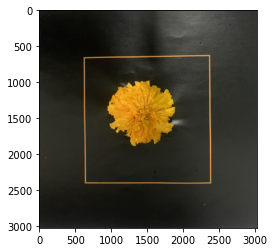

[[2.0690336e-09 3.5276811e-05 9.9983716e-01 1.2755138e-04]]
real:M022.jpg
predict:M


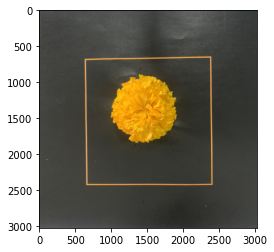

[[1.0000000e+00 1.7217313e-09 1.0595066e-09 5.3940397e-16]]
real:XL047.jpg
predict:XL


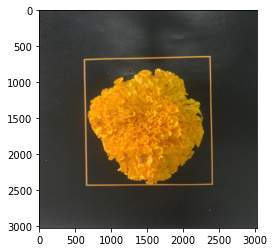

[[3.1847649e-15 1.6286029e-07 1.5926760e-08 9.9999988e-01]]
real:S025.jpg
predict:S


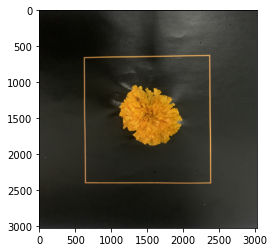

[[1.3275312e-09 9.9999654e-01 6.7030790e-08 3.3406216e-06]]
real:L043.jpg
predict:L


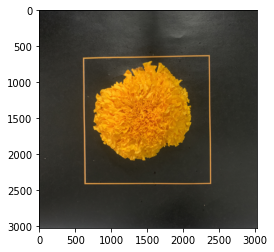

[[1.0000000e+00 3.4060335e-10 5.7094910e-12 9.8262744e-17]]
real:XL0012.jpg
predict:XL


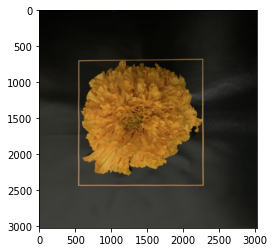

[[4.2690037e-17 1.4311041e-07 1.1390284e-09 9.9999988e-01]]
real:S018.jpg
predict:S


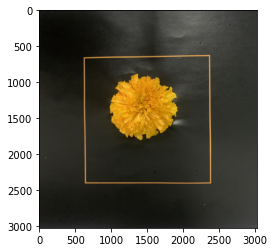

[[2.3791233e-10 9.9999976e-01 6.5408984e-11 2.4879594e-07]]
real:L042.jpg
predict:L


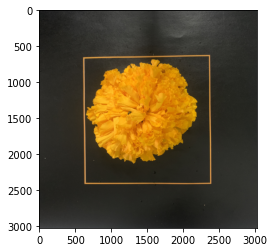

[[9.9537367e-01 4.5600696e-03 6.6371147e-05 4.4226056e-10]]
real:XL043.jpg
predict:XL


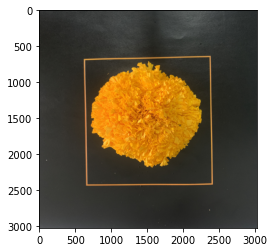

[[4.6713824e-11 9.9997199e-01 2.6028321e-05 2.0338659e-06]]
real:L045.jpg
predict:L


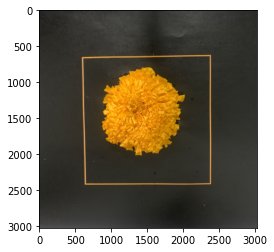

[[2.7241414e-11 9.9999976e-01 5.0849202e-08 1.9577631e-07]]
real:L039.jpg
predict:L


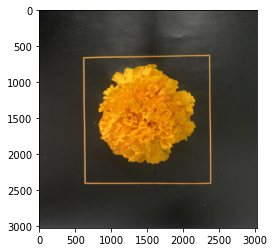

[[6.2838752e-09 7.7068826e-06 9.9985290e-01 1.3933679e-04]]
real:M019.jpg
predict:M


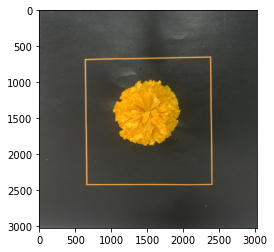

[[3.2844913e-08 2.7251133e-06 9.9999726e-01 5.4516999e-08]]
real:M023.jpg
predict:M


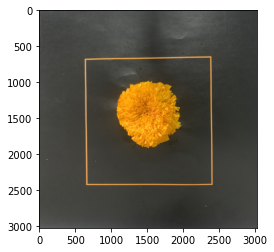

[[1.0800352e-11 1.5266030e-05 4.2345646e-06 9.9998045e-01]]
real:S027.jpg
predict:S


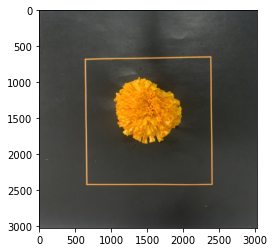

[[1.000000e+00 4.566622e-08 9.264088e-10 2.473752e-13]]
real:XL0014.jpg
predict:XL


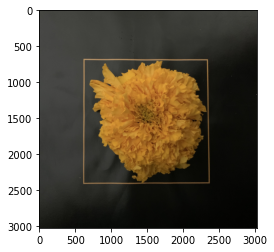

[[3.0446824e-08 2.6971899e-04 9.9968839e-01 4.1807914e-05]]
real:M048.jpg
predict:M


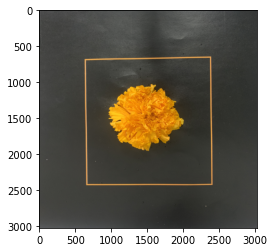

[[7.7333771e-11 9.9999988e-01 8.3453235e-09 9.2979782e-08]]
real:L029.jpg
predict:L


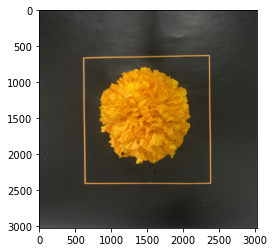

[[6.0342100e-09 3.8591996e-05 9.9996030e-01 1.0955434e-06]]
real:M047.jpg
predict:M


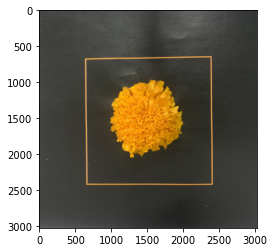

[[2.2559839e-17 8.0571079e-09 4.6255791e-10 1.0000000e+00]]
real:S045.jpg
predict:S


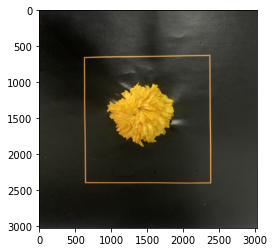

[[2.0878621e-08 9.0921105e-07 9.9998641e-01 1.2599855e-05]]
real:M025.jpg
predict:M


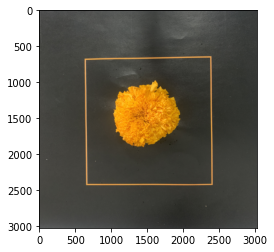

[[1.5363244e-09 9.9999976e-01 6.1503485e-08 1.1335494e-07]]
real:L032.jpg
predict:L


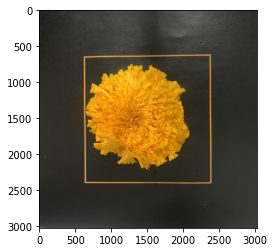

[[6.3515291e-19 3.4575285e-09 2.1933165e-13 1.0000000e+00]]
real:S047.jpg
predict:S


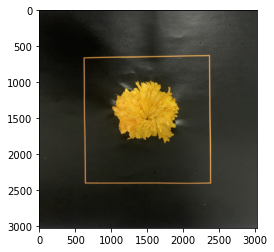

[[3.5246821e-09 2.1214967e-07 9.9999678e-01 2.9820153e-06]]
real:M043.jpg
predict:M


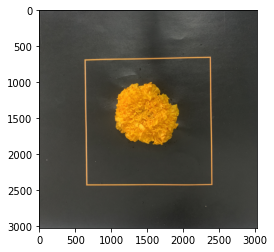

[[3.1888802e-15 1.8582008e-06 3.7158536e-08 9.9999809e-01]]
real:S019.jpg
predict:S


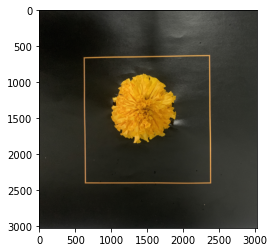

[[7.7506064e-09 3.6102534e-05 9.9996233e-01 1.5803595e-06]]
real:M045.jpg
predict:M


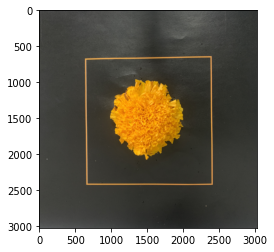

[[1.3012621e-18 3.2814114e-09 1.1706867e-12 1.0000000e+00]]
real:S023.jpg
predict:S


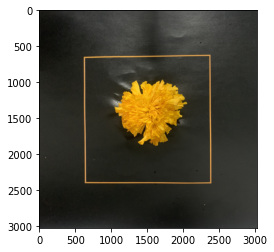

[[1.93203332e-16 1.49554735e-05 2.67550843e-10 9.99985099e-01]]
real:S022.jpg
predict:S


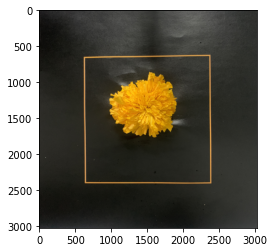

[[1.0000000e+00 1.0039098e-08 2.3337294e-11 2.0689214e-16]]
real:XL042.jpg
predict:XL


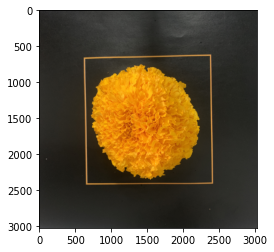

[[1.0847896e-16 1.3043152e-08 1.6691650e-11 1.0000000e+00]]
real:S044.jpg
predict:S


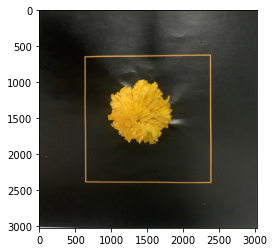

In [38]:
testpath = 'newtest/'
testImg = [testpath+f for f in listdir(testpath) if listdir(join(testpath, f))]
rimg = []
for imagePath in (testImg):
    for item in (os.listdir(imagePath)):
        file = os.path.join(imagePath, item)
        if item.split('.')[0] != "":
           
          img = cv2.imread(file , cv2.COLOR_BGR2RGB)
          ori = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          img = cv2.resize(img ,(width,width))
          rimg = np.array(img)
          rimg = rimg.astype('float32')
          rimg /= 255
          rimg = np.reshape(rimg ,(1,128,128,3))
          predict = model.predict(rimg)
          label = ['XL','L','M','S']
          result = label[np.argmax(predict)]
          print(predict) #ความน่าจะเป็น
          print('real:'+str(item))
          print('predict:'+str(result))
          plt.imshow(ori)
          plt.show()

